# Exercise 02: Bar

Подключаемся к базе данных

In [6]:
import pandas as pd
import sqlite3


connection = sqlite3.connect("../data/checking-logs.sqlite")

Выполняем запрос, который получает дату из таблицы `checker`, выбирая только пользователей, а не администраторов.

In [7]:
query = """
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%'
GROUP BY timestamp
"""

commits = pd.io.sql.read_sql(query, connection)

Работаем с датафреём и выделяем необходимые данные

In [8]:
commits['datetime'] = pd.to_datetime(commits['timestamp'])
commits['date'] = commits['datetime'].dt.date
commits['hour'] = commits['datetime'].dt.hour

labels = ['night', 'morning', 'afternoon', 'evening']
bins = [0, 4, 10, 17, 24]
commits['period'] = pd.cut(commits['hour'], bins=bins, labels=labels, right=False)

daily = commits.groupby(['date', 'period']).size().reset_index(name='count')
wide = daily.pivot(index='date', columns='period', values='count').fillna(0)

wide.count()

/tmp/ipykernel_2136/1981733517.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily = commits.groupby(['date', 'period']).size().reset_index(name='count')


period
night        35
morning      35
afternoon    35
evening      35
dtype: int64

С помощью метода .plot() в Pandas создаём график

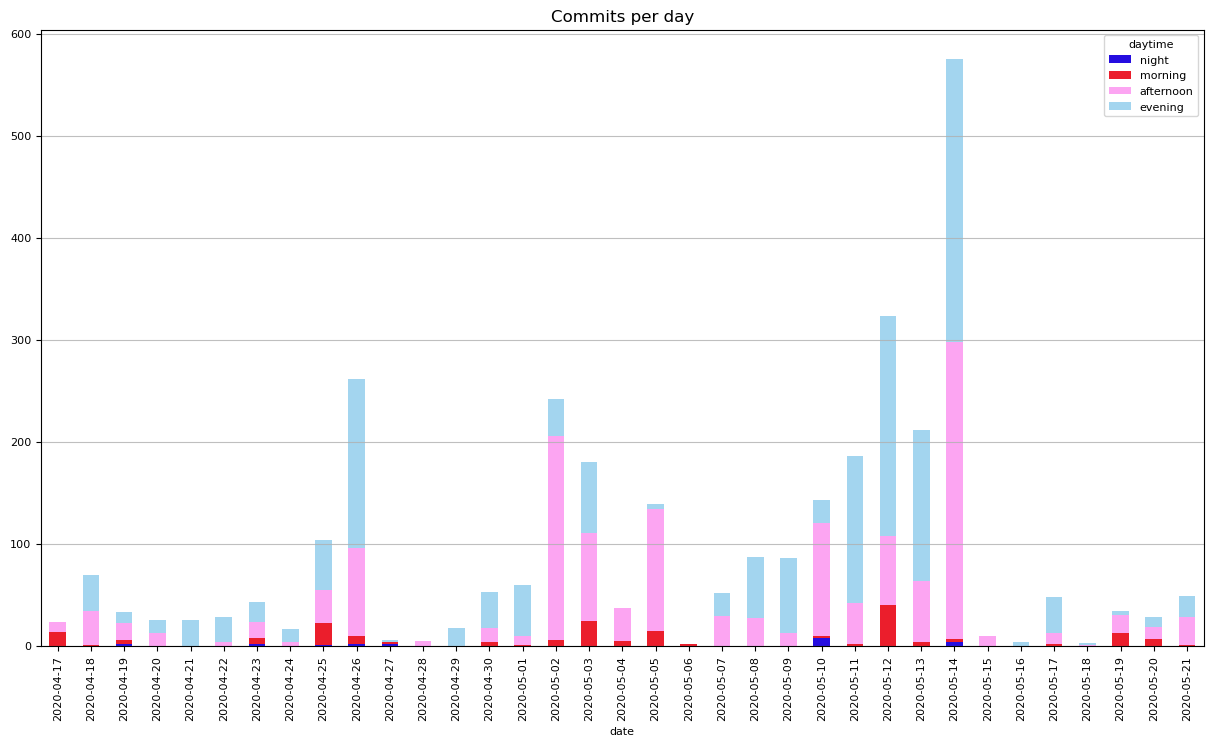

In [9]:
ax = wide.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 8),
    title='Commits per day',
    fontsize=8,
    color=["#250DE0", "#EB1E2C", "#FCA5F2", "#A3D5EF"],
    width=0.5
)

ax.set_xlabel("date", fontsize=8)
ax.legend(title='daytime', fontsize=8, title_fontsize=8, loc='upper right')
ax.grid(True, axis='y', linestyle='-', alpha=0.8)

Закрываем соединение с базой данных

In [10]:
connection.close()

Когда наши пользователи обычно заходят в лаборатории: ночью, утром, днём или вечером? 

Ответ: чаще всего `днём и вечером `

Вот этот день: `2020-05-12`